### 1. Installing & Importing Library

In [1]:
import keras
print(keras.__version__)

2.11.0


In [2]:
pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 2.4 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


In [3]:
from PyEMD import EMD

In [4]:
# !git clone https://github.com/titu1994/Keras-just-another-network-JANET

In [5]:
# !git clone https://github.com/JosvanderWesthuizen/janet

In [6]:
# import sys
# sys.path.insert(0,'/content/janet/requirements.txt')

In [7]:
from scipy.io import loadmat

In [8]:
import tensorflow as tf

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os 
import scipy
import math
import keras
from scipy.stats import entropy
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from scipy import signal

In [10]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [12]:
from sklearn.preprocessing import scale,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

In [13]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
from sklearn.metrics import silhouette_score

### 2. Download Data

#### Time Features

In [ ]:
time_dat_1 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features.csv')
time_dat_2 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_1750.csv')
time_dat_3 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_FE_1750.csv')
time_dat_4 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_1772.csv')
time_dat_5 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_FE_1772.csv')
time_dat_6 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_1797.csv')
time_dat_7 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_FE_1797.csv')

In [ ]:
time_dat_1.shape

(6820, 10)

In [ ]:
time_dat_1

,Unnamed: 0,rms,kurtosis,max,min,std,mean,crest_factor,skewness,fault
0,0,0.135563,0.286809,0.457285,-0.455407,0.134853,0.013859,3.373228,0.099459,0.007-Ball.mat
1,1,0.139051,-0.190881,0.376759,-0.415562,0.138127,0.016008,2.709500,-0.049557,0.007-Ball.mat
2,2,0.139974,-0.022892,0.450818,-0.386982,0.139237,0.014338,3.220734,-0.114988,0.007-Ball.mat
3,3,0.156974,-0.371071,0.459788,-0.423906,0.156354,0.013941,2.929073,-0.005449,0.007-Ball.mat
4,4,0.148735,-0.497189,0.435589,-0.353812,0.148195,0.012668,2.928617,0.066072,0.007-Ball.mat
...,...,...,...,...,...,...,...,...,...,...
6815,481,0.071024,-0.150088,0.207155,-0.235110,0.069082,0.016495,2.916690,-0.289409,Normal.mat
6816,482,0.065472,0.168356,0.175654,-0.230729,0.063857,0.014451,2.682883,-0.245658,Normal.mat
6817,483,0.063740,-0.130056,0.187128,-0.184416,0.061818,0.015533,2.935807,-0.141836,Normal.mat
6818,484,0.067178,0.103131,0.223218,-0.215500,0.065347,0.015575,3.322812,0.021237,Normal.mat


#### Wave Features

In [ ]:
merged_dat_1 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_DE_1730.csv')
merged_dat_2 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_DE_1750.csv')
merged_dat_3 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_DE_1772.csv')
merged_dat_4 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_DE_1797.csv')
merged_dat_5 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_FE_1730.csv')
merged_dat_6 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_FE_1730.csv')
merged_dat_7 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_FE_1730.csv')
merged_dat_8 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_FE_1730.csv')

In [ ]:
merged_dat_1.shape

(6820, 10)

In [ ]:
tes_1 = pd.concat([merged_dat_1,
                   merged_dat_2.loc[merged_dat_2['0.1']=='Normal.mat']],axis=0)

In [ ]:
tes_1.reset_index().drop(['Unnamed: 0','index'],axis=1,inplace=True)

In [ ]:
tes_2 =pd.concat([merged_dat_1.loc[merged_dat_1['0.1']=='Normal.mat'],
                   merged_dat_2.loc[merged_dat_2['0.1']=='Normal.mat'],
                   merged_dat_3.loc[merged_dat_3['0.1']=='Normal.mat']],axis=0)

In [ ]:
tes_2.reset_index().drop(['Unnamed: 0','index'],axis=1,inplace=True)

In [ ]:
def drop_col(gabung_dat_1):
  gabung_dat_test_1 = gabung_dat_1.loc[(gabung_dat_1['0.1']!="0.007-OuterRace3.mat")
                  & (gabung_dat_1['0.1']!="0.007-OuterRace12.mat")
                  & (gabung_dat_1['0.1']!="0.014-OuterRace12.mat")
                  & (gabung_dat_1['0.1']!="0.014-OuterRace3.mat")
                  & (gabung_dat_1['0.1']!="0.021-OuterRace12.mat")
                  & (gabung_dat_1['0.1']!="0.021-OuterRace3.mat")].reset_index().drop(
                      'index',axis=1
                  )

  return gabung_dat_test_1

### Wave Features Filtered

In [ ]:
wav_dat_1 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_DE_1730_filtered.csv')
wav_dat_2 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_DE_1750_filtered.csv')
wav_dat_3 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_DE_1772_filtered.csv')
wav_dat_4 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_DE_1797_filtered.csv')
wav_dat_5 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_FE_1730_filtered.csv')
wav_dat_6 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_FE_1730_filtered.csv')
wav_dat_7 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_FE_1730_filtered.csv')
wav_dat_8 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_FE_1730_filtered.csv')

In [ ]:
wav_dat_1

,Unnamed: 0,0,1,2,3,4,5,6,7,0.1
0,0,6.574030,4.703352,0.819940,1.032638,0.189570,0.237368,0.040311,0.032429,0.007-Ball.mat
1,1,7.044278,4.889275,0.815676,1.295773,0.187417,0.296302,0.048880,0.041211,0.007-Ball.mat
2,2,7.458907,4.207235,0.674522,1.476732,0.154113,0.337489,0.055499,0.041206,0.007-Ball.mat
3,3,6.145178,10.096322,1.688907,1.217135,0.388335,0.277475,0.044787,0.078592,0.007-Ball.mat
4,4,6.051937,8.224890,1.390868,1.042623,0.320749,0.238607,0.039533,0.061394,0.007-Ball.mat
...,...,...,...,...,...,...,...,...,...,...
6815,6815,0.357367,0.638428,0.072028,0.220550,0.015904,0.046072,0.004836,0.017641,Normal.mat
6816,6816,0.301984,0.540396,0.060832,0.170082,0.013682,0.035869,0.004473,0.014788,Normal.mat
6817,6817,0.226216,0.542588,0.065389,0.168461,0.014310,0.035087,0.003706,0.014187,Normal.mat
6818,6818,0.394323,0.728437,0.086777,0.229193,0.019288,0.048274,0.005420,0.018663,Normal.mat


<ipython-input-22-4620fcd655e9>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
<ipython-input-22-4620fcd655e9>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.fi

<Figure size 432x288 with 0 Axes>

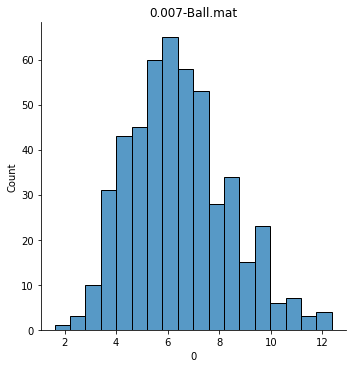

<Figure size 432x288 with 0 Axes>

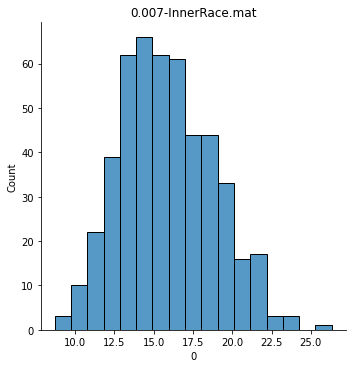

<Figure size 432x288 with 0 Axes>

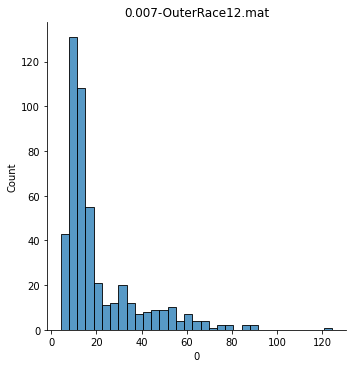

<Figure size 432x288 with 0 Axes>

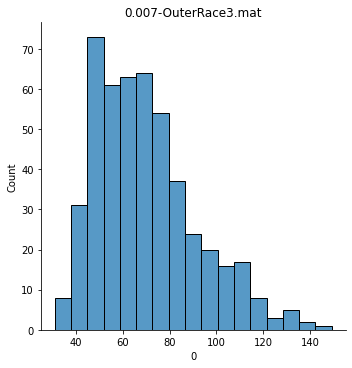

<Figure size 432x288 with 0 Axes>

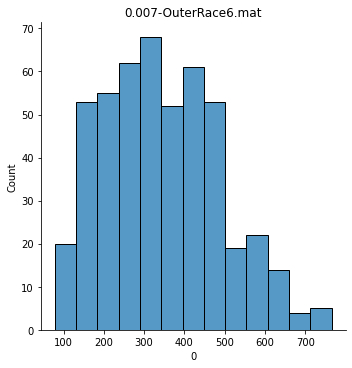

<Figure size 432x288 with 0 Axes>

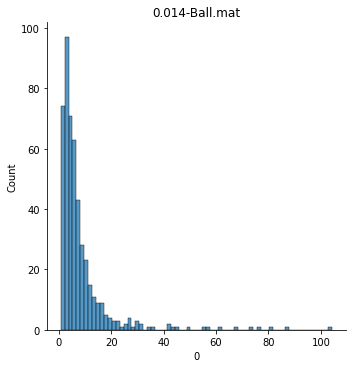

<Figure size 432x288 with 0 Axes>

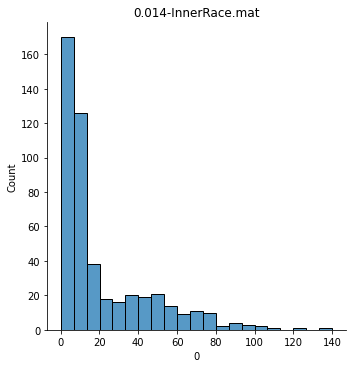

<Figure size 432x288 with 0 Axes>

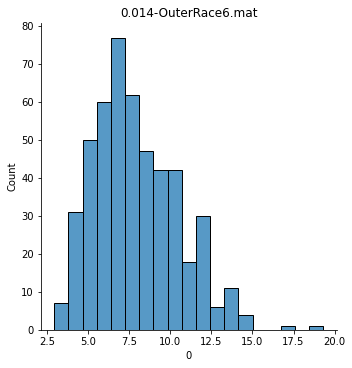

<Figure size 432x288 with 0 Axes>

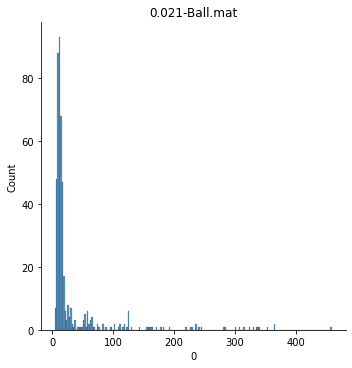

<Figure size 432x288 with 0 Axes>

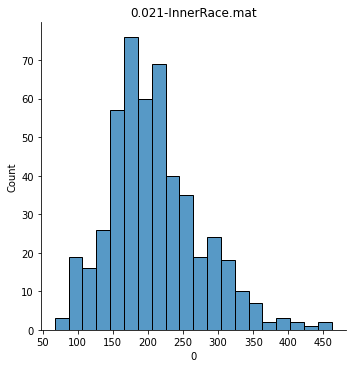

<Figure size 432x288 with 0 Axes>

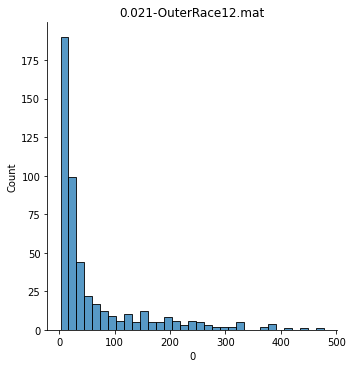

<Figure size 432x288 with 0 Axes>

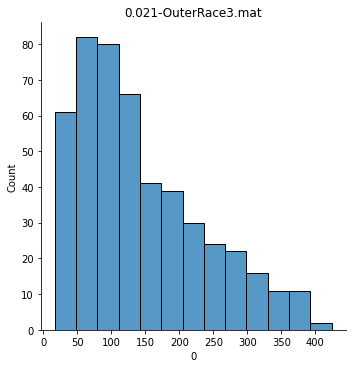

<Figure size 432x288 with 0 Axes>

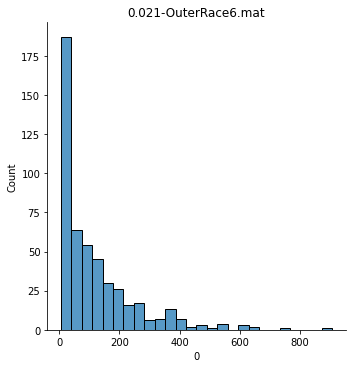

<Figure size 432x288 with 0 Axes>

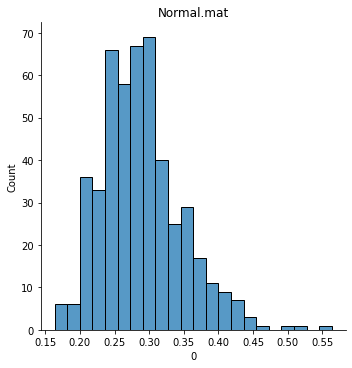

In [ ]:
for i in (wav_dat_1['0.1'].unique()):
  plt.figure()
  sns.displot(wav_dat_1.iloc[:,1].loc[wav_dat_1['0.1']==i])
  plt.title(i)

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

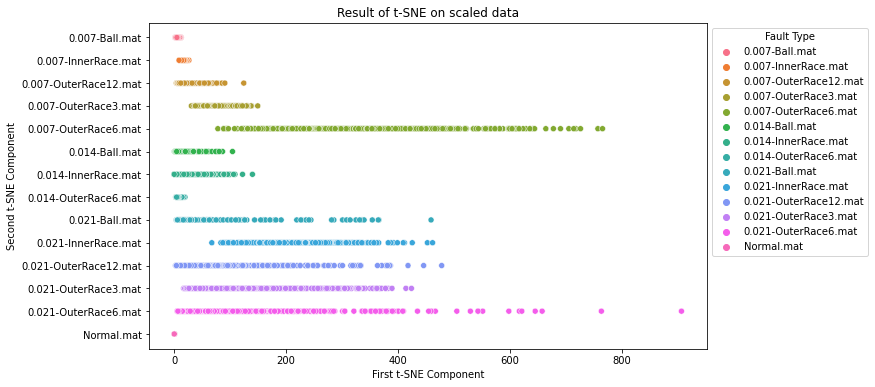

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=wav_dat_1.iloc[:,1], y= wav_dat_1.iloc[:,9],
        hue=wav_dat_1['0.1'],
        data=pd.DataFrame(wav_dat_1))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
merged_dat_1 = drop_col(merged_dat_1)
wav_dat_1 = drop_col(wav_dat_1)

In [ ]:
temp_normal_1750 = wav_dat_2.loc[wav_dat_2['0.1']=='Normal.mat']
temp_normal_1750['0.1'] = ["Normal.mat_1750" for i in range(temp_normal_1750.shape[0])]

<ipython-input-29-2fc294acc293>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_normal_1750['0.1'] = ["Normal.mat_1750" for i in range(temp_normal_1750.shape[0])]


In [ ]:
temp_normal_1772 = wav_dat_3.loc[wav_dat_3['0.1']=='Normal.mat']
temp_normal_1772['0.1'] = ["Normal.mat_1772" for i in range(temp_normal_1772.shape[0])]

<ipython-input-30-a7fdde6fcc5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_normal_1772['0.1'] = ["Normal.mat_1772" for i in range(temp_normal_1772.shape[0])]


In [ ]:
tes_2_wav =pd.concat([wav_dat_1.loc[wav_dat_1['0.1']=='Normal.mat'],
                   temp_normal_1772,
                   temp_normal_1750],axis=0)

In [ ]:
temp_normal_1772

,Unnamed: 0,0,1,2,3,4,5,6,7,0.1
6221,6221,0.392506,0.796705,0.085871,0.285657,0.018686,0.060574,0.006728,0.022732,Normal.mat_1772
6222,6222,0.275393,0.842256,0.095291,0.275275,0.020592,0.057921,0.006027,0.022834,Normal.mat_1772
6223,6223,0.280864,0.806971,0.087058,0.272701,0.018926,0.057589,0.006179,0.022732,Normal.mat_1772
6224,6224,0.227245,0.731165,0.085302,0.233117,0.018471,0.048849,0.004875,0.019277,Normal.mat_1772
6225,6225,0.273459,0.909788,0.095836,0.325075,0.020457,0.068414,0.006902,0.026720,Normal.mat_1772
...,...,...,...,...,...,...,...,...,...,...
6700,6700,0.379665,0.918729,0.096248,0.329401,0.020766,0.069802,0.007584,0.027281,Normal.mat_1772
6701,6701,0.490063,1.565006,0.196872,0.431721,0.042958,0.091406,0.009600,0.036085,Normal.mat_1772
6702,6702,0.345233,0.878361,0.096808,0.319560,0.020825,0.067323,0.006807,0.024619,Normal.mat_1772
6703,6703,0.331988,0.670805,0.075844,0.236421,0.016412,0.050178,0.005771,0.018752,Normal.mat_1772


### Entropy Features Filtered

In [ ]:
entro_dat_1 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_DE_1730_filtered.csv')
entro_dat_2 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_DE_1750_filtered.csv')
entro_dat_3 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_DE_1772_filtered.csv')
entro_dat_4 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_DE_1797_filtered.csv')
entro_dat_5 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_FE_1730_filtered.csv')
entro_dat_6 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_FE_1730_filtered.csv')
entro_dat_7 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_FE_1730_filtered.csv')
entro_dat_8 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_FE_1730_filtered.csv')

In [ ]:
entro_dat_1

,Unnamed: 0,0,1,2,3,4,5,6,7,0.1
0,0,8.823756,9.877000,2.778735,2.391748,0.855100,0.691573,0.209764,0.344443,0.007-Ball.mat
1,1,8.638385,11.986584,3.385297,2.730363,1.026607,0.806825,0.247129,0.413871,0.007-Ball.mat
2,2,9.798510,11.521805,3.228156,3.639007,0.949300,1.076816,0.259711,0.369997,0.007-Ball.mat
3,3,12.203145,13.165349,3.735545,4.332906,1.124723,1.323350,0.335010,0.420818,0.007-Ball.mat
4,4,12.399372,11.418682,3.217944,3.904819,0.957435,1.163081,0.271563,0.366513,0.007-Ball.mat
...,...,...,...,...,...,...,...,...,...,...
6815,6815,1.562632,3.369706,1.313662,2.548955,0.235379,0.531079,0.458389,0.874228,Normal.mat
6816,6816,1.260898,2.802540,1.344526,2.477367,0.233699,0.492953,0.426854,0.813181,Normal.mat
6817,6817,1.554470,2.796613,1.078857,2.375943,0.178822,0.477594,0.445830,0.819579,Normal.mat
6818,6818,1.415348,3.658735,1.241026,2.620835,0.229844,0.550840,0.429939,0.815070,Normal.mat


In [ ]:
merged_dat_1 = drop_col(merged_dat_1)
wav_dat_1 = drop_col(wav_dat_1)
entro_dat_1 = drop_col(entro_dat_1)

time_dat_1 = time_dat_1.loc[(time_dat_1['fault']!="0.007-OuterRace3.mat")
                & (time_dat_1['fault']!="0.007-OuterRace12.mat")
                & (time_dat_1['fault']!="0.014-OuterRace12.mat")
                & (time_dat_1['fault']!="0.014-OuterRace3.mat")
                & (time_dat_1['fault']!="0.021-OuterRace12.mat")
                & (time_dat_1['fault']!="0.021-OuterRace3.mat")].reset_index().drop(
                    'index',axis=1
                )

In [ ]:
temp_normal_1750 = wav_dat_2.loc[wav_dat_2['0.1']=='Normal.mat']
temp_normal_1750['0.1'] = ["Normal.mat_1750" for i in range(temp_normal_1750.shape[0])]

<ipython-input-36-2fc294acc293>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_normal_1750['0.1'] = ["Normal.mat_1750" for i in range(temp_normal_1750.shape[0])]


In [ ]:
temp_normal_1772 = wav_dat_3.loc[wav_dat_3['0.1']=='Normal.mat']
temp_normal_1772['0.1'] = ["Normal.mat_1772" for i in range(temp_normal_1772.shape[0])]

<ipython-input-37-a7fdde6fcc5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_normal_1772['0.1'] = ["Normal.mat_1772" for i in range(temp_normal_1772.shape[0])]


In [ ]:
tes_2_wav =pd.concat([wav_dat_1.loc[wav_dat_1['0.1']=='Normal.mat'],
                   temp_normal_1772,
                   temp_normal_1750],axis=0)

### Gabungan Wave Energy dan Entropy Features

In [ ]:
gabung_dat_1 = pd.concat([wav_dat_1.drop(['Unnamed: 0','0.1'],axis=1),
           entro_dat_1.drop('Unnamed: 0',axis=1)],axis=1)

In [ ]:
gabung_dat_1.iloc[0,:]

0             6.57403
1            4.703352
2             0.81994
3            1.032638
4             0.18957
5            0.237368
6            0.040311
7            0.032429
8            8.823756
9               9.877
10           2.778735
11           2.391748
12             0.8551
13           0.691573
14           0.209764
15           0.344443
0.1    0.007-Ball.mat
Name: 0, dtype: object

In [ ]:
gabung_dat_1.columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '0.1']

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

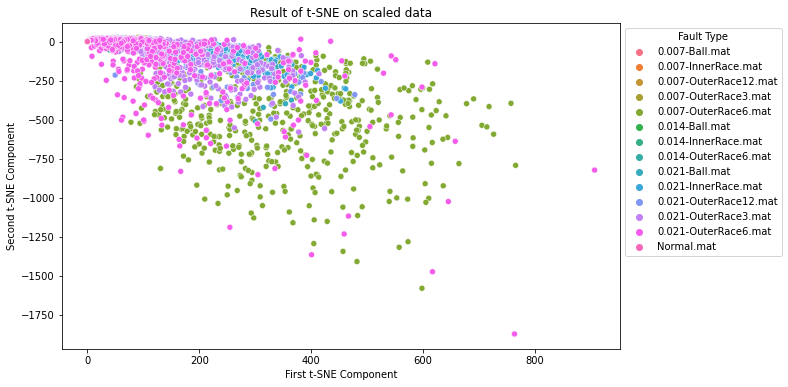

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=gabung_dat_1.iloc[:,0], y= gabung_dat_1.iloc[:,8],
        hue=wav_dat_1['0.1'],
        data=pd.DataFrame(wav_dat_1))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
gabung_dat_test_1 = gabung_dat_1.loc[(gabung_dat_1['0.1']!="0.007-OuterRace3.mat")
                  & (gabung_dat_1['0.1']!="0.007-OuterRace12.mat")
                  & (gabung_dat_1['0.1']!="0.014-OuterRace12.mat")
                  & (gabung_dat_1['0.1']!="0.014-OuterRace3.mat")
                  & (gabung_dat_1['0.1']!="0.021-OuterRace12.mat")
                  & (gabung_dat_1['0.1']!="0.021-OuterRace3.mat")].reset_index().drop(
                      'index',axis=1
                  )

In [ ]:
gabung_dat_test_1['0.1'].unique()

array(['0.007-Ball.mat', '0.007-InnerRace.mat', '0.007-OuterRace6.mat',
       '0.014-Ball.mat', '0.014-InnerRace.mat', '0.014-OuterRace6.mat',
       '0.021-Ball.mat', '0.021-InnerRace.mat', '0.021-OuterRace6.mat',
       'Normal.mat'], dtype=object)

### Wave Features New 32 Kolom

In [ ]:
dat_1 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1730.csv')
dat_2 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1750.csv')
dat_3 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1772.csv')
dat_4 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1797.csv')
dat_5 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1730.csv')
dat_6 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1750.csv')
dat_7 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1772.csv')
dat_8 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1797.csv')

In [ ]:
dat_2['0.1'] = dat_2['0.1'].values + '1'
dat_3['0.1'] = dat_3['0.1'].values + '2'
dat_4['0.1'] = dat_4['0.1'].values + '3'
dat_5['0.1'] = dat_5['0.1'].values + '4'
dat_6['0.1'] = dat_6['0.1'].values + '5'
dat_7['0.1'] = dat_7['0.1'].values + '6'
dat_8['0.1'] = dat_8['0.1'].values + '7'

In [ ]:
ims = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_feature.csv')

In [ ]:
ims

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,0,0.263429,0.510108,0.422548,0.576716,3.673117e-04,4.323022e-03,0.150417,0.035905,0.012103,...,6.759557,0.000727,19601.593625,14.255373,0.006250,13529.880478,84.566687,0.002121,15442.231076,32.759701
1,1,0.321100,0.597377,0.366410,0.658163,1.765425e-03,4.933358e-03,0.128983,0.048737,0.011802,...,7.521378,0.000701,19792.828685,13.872623,0.003560,13529.880478,48.165846,0.002440,15298.804781,37.331551
2,2,0.419357,0.610066,0.433964,0.770897,5.317970e-04,5.351859e-03,0.152372,0.049151,0.016150,...,6.030367,0.000726,19505.976096,14.170223,0.004400,13768.924303,60.578938,0.003568,15872.509960,56.636964
3,3,0.280997,0.718374,0.433965,0.880243,7.870298e-04,6.661580e-03,0.171253,0.062173,0.011065,...,7.853154,0.000869,19123.505976,16.612446,0.003870,14342.629482,55.512676,0.002994,15107.569721,45.225987
4,4,0.441612,0.728096,0.432588,0.977741,4.579399e-04,6.270471e-03,0.161132,0.072668,0.016873,...,5.683537,0.000876,19505.976096,17.087101,0.005460,13673.306773,74.657955,0.003065,15681.274900,48.070680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20659,16,0.000014,0.000046,0.000013,0.000033,1.868556e-08,4.056053e-07,0.000004,0.000002,0.000042,...,0.036000,0.000007,18501.992032,0.131798,0.000018,14151.394422,0.253261,0.000014,15633.466135,0.226093
20660,17,0.000016,0.000044,0.000010,0.000035,2.111840e-08,3.285277e-07,0.000009,0.000002,0.000040,...,0.040470,0.000006,19840.637450,0.120827,0.000039,12478.087649,0.492184,0.000018,16159.362550,0.283135
20661,18,0.000010,0.000048,0.000016,0.000025,5.002112e-08,3.256248e-07,0.000007,0.000002,0.000043,...,0.043215,0.000007,19219.123506,0.128756,0.000029,13051.792829,0.376004,0.000016,15537.848606,0.248979
20662,19,0.000013,0.000046,0.000015,0.000034,2.364461e-08,3.910364e-07,0.000007,0.000002,0.000048,...,0.028004,0.000009,19171.314741,0.164120,0.000030,12478.087649,0.375644,0.000017,16207.171315,0.273104


### Gabungan Ketiganya

In [ ]:
gabung_all_1 = pd.concat([wav_dat_1.drop(['Unnamed: 0','0.1'],axis=1),
           entro_dat_1.drop(['Unnamed: 0','0.1'],axis=1),
           time_dat_1.drop('Unnamed: 0',axis=1)],axis=1)

In [ ]:
gabung_all_1.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '0', '1', '2', '3', '4', '5',
       '6', '7', 'rms', 'kurtosis', 'max', 'min', 'std', 'mean',
       'crest_factor', 'skewness', 'fault'],
      dtype='object')

In [ ]:
gabung_all_1

,0,1,2,3,4,5,6,7,0,1,...,7,rms,kurtosis,max,min,std,mean,crest_factor,skewness,fault
0,6.574030,4.703352,0.819940,1.032638,0.189570,0.237368,0.040311,0.032429,8.823756,9.877000,...,0.344443,0.135563,0.286809,0.457285,-0.455407,0.134853,0.013859,3.373228,0.099459,0.007-Ball.mat
1,7.044278,4.889275,0.815676,1.295773,0.187417,0.296302,0.048880,0.041211,8.638385,11.986584,...,0.413871,0.139051,-0.190881,0.376759,-0.415562,0.138127,0.016008,2.709500,-0.049557,0.007-Ball.mat
2,7.458907,4.207235,0.674522,1.476732,0.154113,0.337489,0.055499,0.041206,9.798510,11.521805,...,0.369997,0.139974,-0.022892,0.450818,-0.386982,0.139237,0.014338,3.220734,-0.114988,0.007-Ball.mat
3,6.145178,10.096322,1.688907,1.217135,0.388335,0.277475,0.044787,0.078592,12.203145,13.165349,...,0.420818,0.156974,-0.371071,0.459788,-0.423906,0.156354,0.013941,2.929073,-0.005449,0.007-Ball.mat
4,6.051937,8.224890,1.390868,1.042623,0.320749,0.238607,0.039533,0.061394,12.399372,11.418682,...,0.366513,0.148735,-0.497189,0.435589,-0.353812,0.148195,0.012668,2.928617,0.066072,0.007-Ball.mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,0.357367,0.638428,0.072028,0.220550,0.015904,0.046072,0.004836,0.017641,1.562632,3.369706,...,0.874228,0.071024,-0.150088,0.207155,-0.235110,0.069082,0.016495,2.916690,-0.289409,Normal.mat
4872,0.301984,0.540396,0.060832,0.170082,0.013682,0.035869,0.004473,0.014788,1.260898,2.802540,...,0.813181,0.065472,0.168356,0.175654,-0.230729,0.063857,0.014451,2.682883,-0.245658,Normal.mat
4873,0.226216,0.542588,0.065389,0.168461,0.014310,0.035087,0.003706,0.014187,1.554470,2.796613,...,0.819579,0.063740,-0.130056,0.187128,-0.184416,0.061818,0.015533,2.935807,-0.141836,Normal.mat
4874,0.394323,0.728437,0.086777,0.229193,0.019288,0.048274,0.005420,0.018663,1.415348,3.658735,...,0.815070,0.067178,0.103131,0.223218,-0.215500,0.065347,0.015575,3.322812,0.021237,Normal.mat


In [ ]:
gabung_dat_test_1 = gabung_dat_1.loc[(gabung_dat_1['0.1']!="0.007-OuterRace3.mat")
                  & (gabung_dat_1['0.1']!="0.007-OuterRace12.mat")
                  & (gabung_dat_1['0.1']!="0.014-OuterRace12.mat")
                  & (gabung_dat_1['0.1']!="0.014-OuterRace3.mat")
                  & (gabung_dat_1['0.1']!="0.021-OuterRace12.mat")
                  & (gabung_dat_1['0.1']!="0.021-OuterRace3.mat")].reset_index().drop(
                      'index',axis=1
                  )

In [ ]:
gabung_dat_test_1['0.1'].unique()

array(['0.007-Ball.mat', '0.007-InnerRace.mat', '0.007-OuterRace6.mat',
       '0.014-Ball.mat', '0.014-InnerRace.mat', '0.014-OuterRace6.mat',
       '0.021-Ball.mat', '0.021-InnerRace.mat', '0.021-OuterRace6.mat',
       'Normal.mat'], dtype=object)

### Scaling

In [ ]:
standard = preprocessing.StandardScaler()

In [ ]:
temp_dat = standard.fit_transform(time_dat_1.drop(['Unnamed: 0','fault'],axis=1))

In [ ]:
temp_dat = standard.fit_transform(merged_dat_1.drop(['Unnamed: 0','0.1'],axis=1))

In [ ]:
temp_dat = standard.fit_transform(tes_2_wav.drop(['Unnamed: 0','0.1'],axis=1))

In [ ]:
temp_dat = standard.fit_transform(gabung_dat_1.drop('0.1',axis=1))

In [ ]:
temp_dat = standard.fit_transform(gabung_dat_test_1.drop('0.1',axis=1))

In [ ]:
temp_dat = standard.fit_transform(wav_dat_1.drop(['Unnamed: 0','0.1'],axis=1))

In [ ]:
temp_dat = standard.fit_transform(entro_dat_1.drop(['Unnamed: 0','0.1'],axis=1))

In [ ]:
temp_dat = standard.fit_transform(gabung_all_1.drop(['fault'],axis=1))

In [ ]:
temp_dat = standard.fit_transform(ims.drop('Unnamed: 0',axis=1))

### tSNE

In [ ]:
tsne_res = TSNE(n_components=2,random_state=4).fit_transform(temp_dat)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
tsne_res_wav = TSNE(n_components=2,random_state=4).fit_transform(temp_dat)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
tsne_res_time = TSNE(n_components=2,random_state=4).fit_transform(temp_dat)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
tsne_res_wav_entro = TSNE(n_components=2,random_state=4).fit_transform(temp_dat)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
tsne_res_all = TSNE(n_components=3,random_state=4).fit_transform(temp_dat)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
tsne_res_all = TSNE(n_components=2,random_state=4).fit_transform(temp_dat)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


#### Testing 0

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

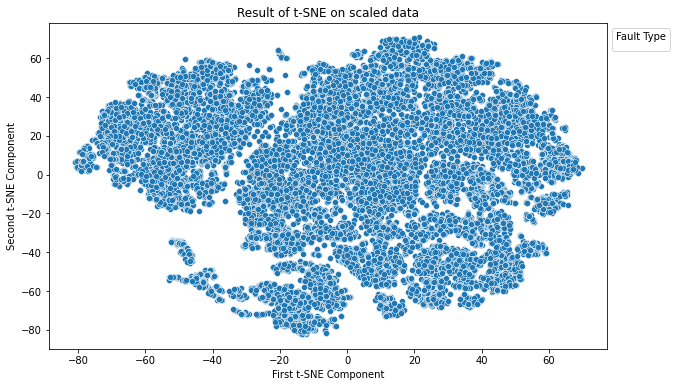

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=tsne_res_all[:,0], y= tsne_res_all[:,1],
        # hue=time_dat_1['fault'],
        data=pd.DataFrame(tsne_res_all))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
score = silhouette_score(tsne_res_time,time_dat_1['fault'])
print(score)
#OUTPUT: 0.7256352649604982

0.04685696


#### Testing 1

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

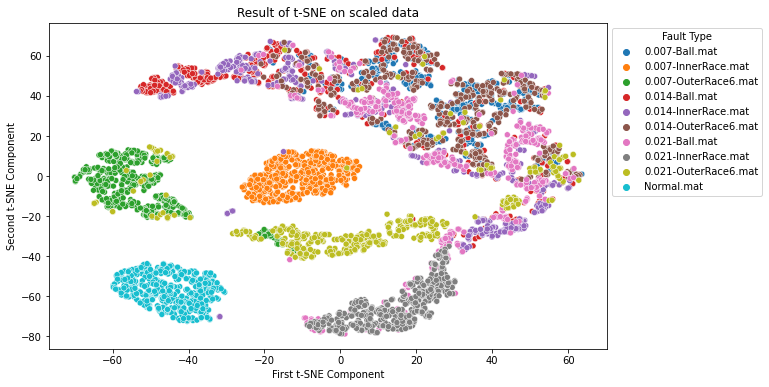

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=tsne_res_wav_entro[:,0], y= tsne_res_wav_entro[:,1],
        hue=gabung_dat_1['0.1'],
        data=pd.DataFrame(tsne_res_wav_entro))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
score = silhouette_score(tsne_res_wav_entro,gabung_dat_1['0.1'])
print(score)
#OUTPUT: 0.7256352649604982

0.18703265


#### Testing 2

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

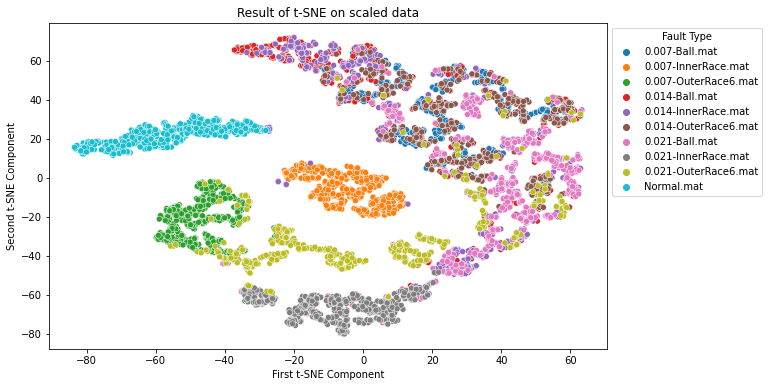

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=tsne_res_wav[:,0], y= tsne_res_wav[:,1],
        hue=wav_dat_1['0.1'],
        data=pd.DataFrame(tsne_res_wav))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
score = silhouette_score(tsne_res_wav,wav_dat_1['0.1'])
print(score)
#OUTPUT: 0.7256352649604982

0.15248284


#### Testing 3

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

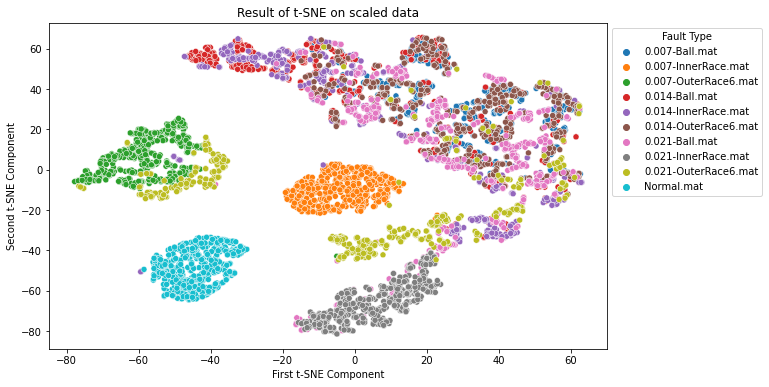

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=tsne_res[:,0], y= tsne_res[:,1],
        hue=entro_dat_1['0.1'],
        data=pd.DataFrame(tsne_res))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
score = silhouette_score(tsne_res,entro_dat_1['0.1'])
print(score)
#OUTPUT: 0.7256352649604982

0.17079681


#### Testing 4

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

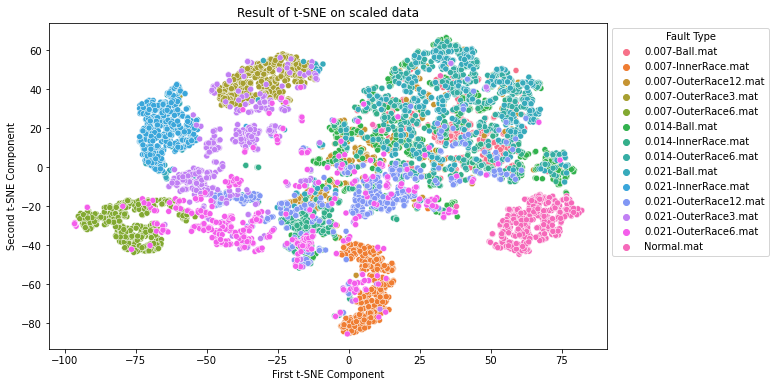

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=tsne_res_all[:,0], y= tsne_res_all[:,1],
        hue=gabung_all_1['fault'],
        data=pd.DataFrame(tsne_res_all))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
score = silhouette_score(tsne_res_all,gabung_all_1['fault'])
print(score)
#OUTPUT: 0.7256352649604982

0.121301934


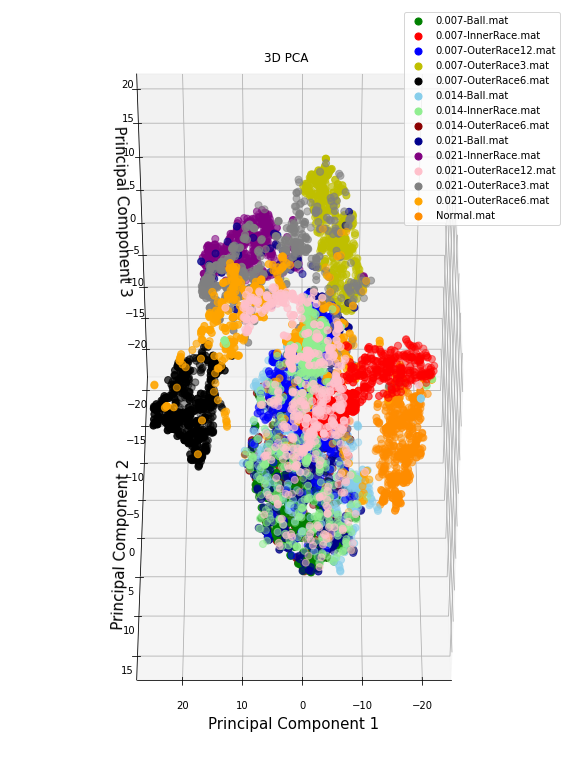

In [ ]:
# %matplotlib qt


fig = plt.figure(figsize=(10,14))
  
# syntax for 3-D projection
ax = plt.axes(projection='3d')
  
# defining all 3 axes
faults = gabung_all_1['fault'].unique()
colors = ['g', 'r','b','y','black', 'skyblue','lightgreen','darkred','darkblue', 'purple','pink','grey','orange', 'darkorange']
for fault, color in zip(faults,colors):
    indicesToKeep = gabung_all_1['fault'] == fault
    ax.scatter3D(pd.DataFrame(tsne_res_all).loc[indicesToKeep, 0]
               , pd.DataFrame(tsne_res_all).loc[indicesToKeep, 2]
               , pd.DataFrame(tsne_res_all).loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(faults)

  
# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

plt.show()

#### Testing 4

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

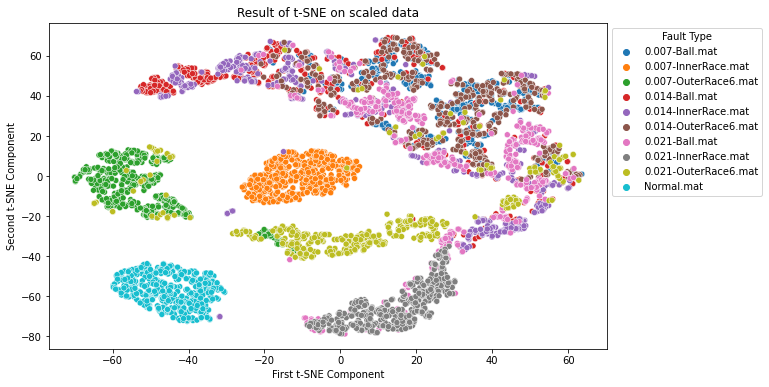

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=tsne_res_wav_entro[:,0], y= tsne_res_wav_entro[:,1],
        hue=gabung_dat_1['0.1'],
        data=pd.DataFrame(tsne_res_wav_entro))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
score = silhouette_score(tsne_res_wav_entro,entro_dat_1['0.1'])
print(score)
#OUTPUT: 0.7256352649604982

0.18703265


### PCA

In [ ]:
pca = PCA(n_components=3,random_state=4).fit_transform(temp_dat)

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

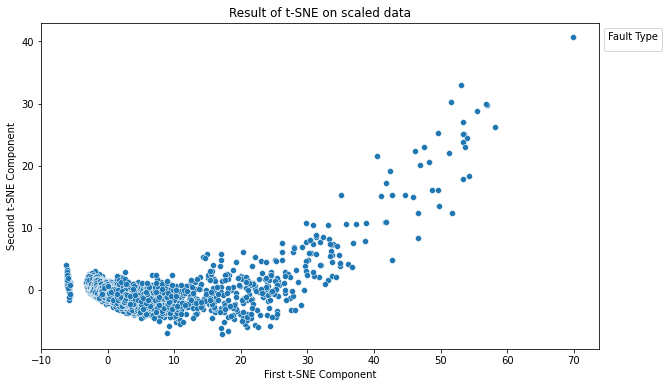

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=pca[:,0], y= pca[:,1],
        # hue=gabung_dat_test_1[20.1'],
        data=pd.DataFrame(pca))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
res_pca=pd.concat([pd.DataFrame(pca),pd.DataFrame(gabung_all_1['fault'])],axis=1)

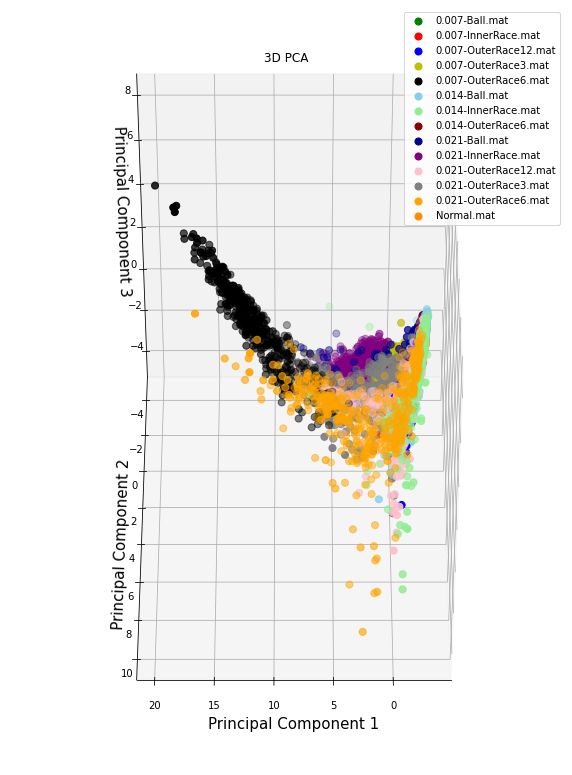

In [ ]:
# %matplotlib qt


fig = plt.figure(figsize=(10,14))
  
# syntax for 3-D projection
ax = plt.axes(projection='3d')
  
# defining all 3 axes
faults = res_pca['fault'].unique()
colors = ['g', 'r','b','y','black', 'skyblue','lightgreen','darkred','darkblue', 'purple','pink','grey','orange', 'darkorange']
for fault, color in zip(faults,colors):
    indicesToKeep = res_pca['fault'] == fault
    ax.scatter3D(res_pca.loc[indicesToKeep, 0]
               , res_pca.loc[indicesToKeep, 2]
               , res_pca.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(faults)

  
# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

plt.show()

In [ ]:
score = silhouette_score(pca,gabung_all_1['fault'])
print(score)
#OUTPUT: 0.7256352649604982

-0.047537514269025895


### Kernel PCA

In [ ]:
kernel_pca = KernelPCA(n_components=3,kernel='poly',random_state=4).fit_transform(temp_dat)

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

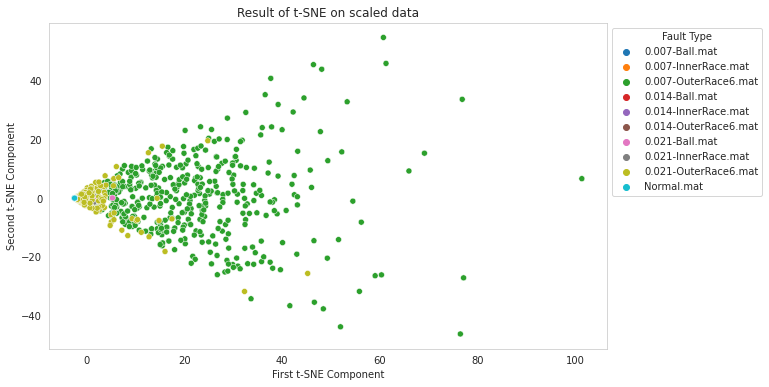

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=kernel_pca[:,0], y= kernel_pca[:,1],
        hue=gabung_dat_test_1['0.1'],
        data=pd.DataFrame(kernel_pca))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
score = silhouette_score(kernel_pca,wav_dat_1['0.1'])
print(score)
#OUTPUT: 0.7256352649604982

-0.13978446780842843


### Incremental PCA

In [ ]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
ipca = IncrementalPCA(n_components=3)
ipca_res = ipca.fit_transform(temp_dat)

In [ ]:
ipca_res=pd.concat([
    pd.DataFrame(ipca_res),
    pd.DataFrame(gabung_all_1['fault'])
],axis=1)

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

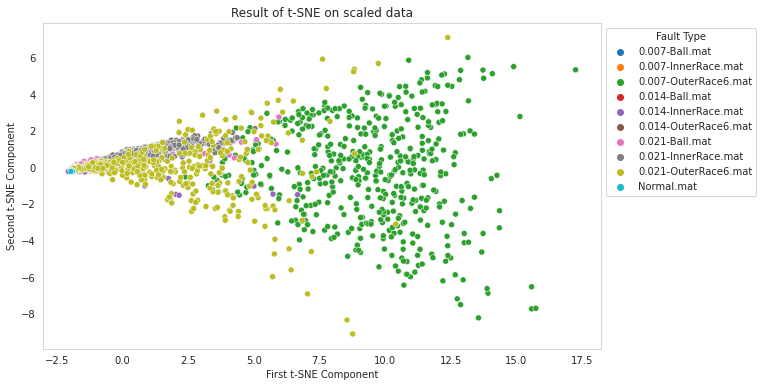

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=ipca_res[:,0], y= ipca_res[:,1],
        hue=wav_dat_1['0.1'],
        data=pd.DataFrame(ipca_res))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
score = silhouette_score(ipca_res,gabung_dat_1['0.1'])
print(score)
#OUTPUT: 0.7256352649604982

-0.0033616793643149565


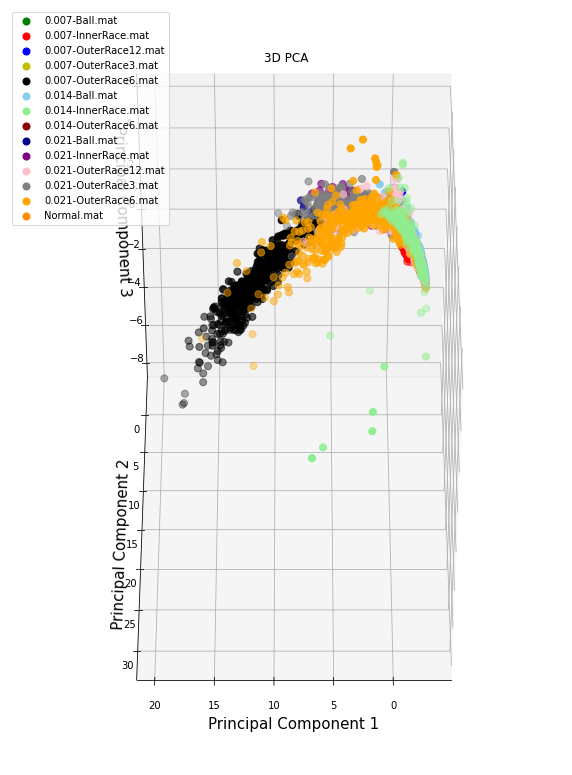

In [ ]:
# %matplotlib qt


fig = plt.figure(figsize=(10,14))
  
# syntax for 3-D projection
ax = plt.axes(projection='3d')
  
# defining all 3 axes
faults = res_pca['fault'].unique()
colors = ['g', 'r','b','y','black', 'skyblue','lightgreen','darkred','darkblue', 'purple','pink','grey','orange', 'darkorange']
for fault, color in zip(faults,colors):
    indicesToKeep = ipca_res['fault'] == fault
    ax.scatter3D(ipca_res.loc[indicesToKeep, 0]
               , ipca_res.loc[indicesToKeep, 2]
               , ipca_res.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(faults)

  
# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

plt.show()# %matplotlib qt

### LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')

pred=lda.fit_transform(temp_dat)

TypeError: ignored

In [ ]:
lda_res=pd.concat([pd.DataFrame(pred),
                  pd.DataFrame(wav_dat_1['0.1'])],axis=1)

In [ ]:
pred.shape

(6820, 13)

In [ ]:
ipca = IncrementalPCA(n_components=3)
pca_1 = ipca.fit_transform(temp_dat)

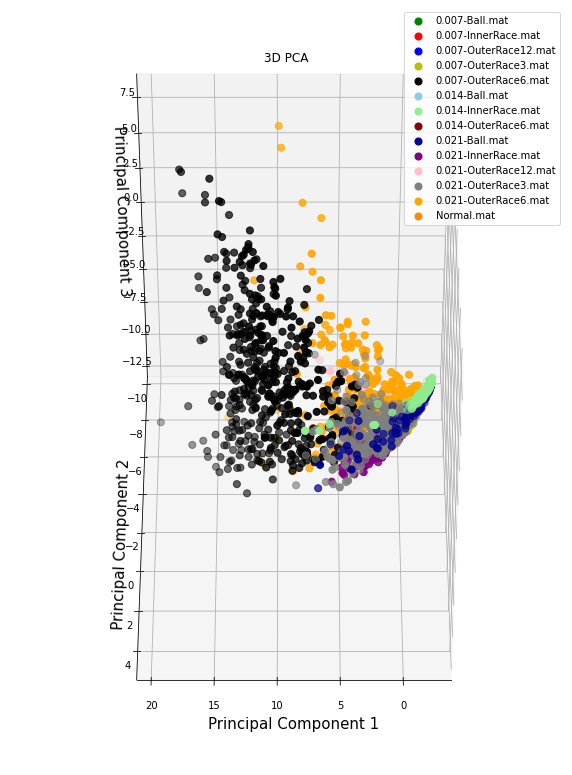

In [ ]:
# %matplotlib qt


fig = plt.figure(figsize=(10,14))
  
# syntax for 3-D projection
ax = plt.axes(projection='3d')
  
# defining all 3 axes
faults = res_pca['0.1'].unique()
colors = ['g', 'r','b','y','black', 'skyblue','lightgreen','darkred','darkblue', 'purple','pink','grey','orange', 'darkorange']
for fault, color in zip(faults,colors):
    indicesToKeep = res_pca['0.1'] == fault
    ax.scatter3D(pd.DataFrame(pca_1).loc[indicesToKeep, 0]
               , pd.DataFrame(pca_1).loc[indicesToKeep, 1]
               , pd.DataFrame(pca_1).loc[indicesToKeep, 2]
               , c = color
               , s = 50)
ax.legend(faults)

  
# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

plt.show()

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

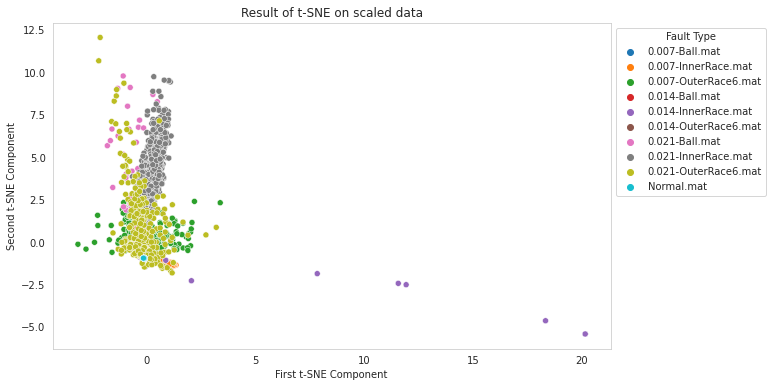

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=pca_1[:,3], y= pca_1[:,1],
        hue=wav_dat_1['0.1'],
        data=pd.DataFrame(pca_1))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
score = silhouette_score(pred,wav_dat_1['0.1'])
print(score)
#OUTPUT: 0.7256352649604982

0.11472078617324369


### KNN Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.cluster import AgglomerativeClustering

for linkage in ("ward", "average", "complete", "single"):
  for j in range(2,21):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=j)
    pred=clustering.fit_predict(tsne_res_all)
    labels = clustering.labels_

    # Get cluster centers
    # cluster_centers = clustering.cluster_centers_
    score = silhouette_score(tsne_res_all,pred)
    print(linkage,j,score)


ward 2 0.32396245
ward 3 0.28177544
ward 4 0.31671023
ward 5 0.31248564
ward 6 0.32653457
ward 7 0.32952175
ward 8 0.35224083
ward 9 0.34507325
ward 10 0.3547673
ward 11 0.35514662
ward 12 0.35639936
ward 13 0.359101
ward 14 0.35519344
ward 15 0.35763913
ward 16 0.34766054
ward 17 0.34279263
ward 18 0.33262146
ward 19 0.33160862
ward 20 0.332844
average 2 0.3363818
average 3 0.30412447
average 4 0.3222608
average 5 0.33804047
average 6 0.3419141
average 7 0.3270776
average 8 0.3505164
average 9 0.3623039
average 10 0.34084558
average 11 0.33195707
average 12 0.33735183
average 13 0.31374234
average 14 0.31283075
average 15 0.3114175
average 16 0.31600785
average 17 0.3239845
average 18 0.32228485
average 19 0.32315904
average 20 0.31965753
complete 2 0.29002386
complete 3 0.32305193
complete 4 0.33047265
complete 5 0.3326989
complete 6 0.31577957
complete 7 0.26819855
complete 8 0.27307028
complete 9 0.28555736
complete 10 0.30361247
complete 11 0.30287245
complete 12 0.30621657
comple

In [ ]:
for i in range(2,21):
  km = KMeans(n_clusters=i)
  pred = km.fit_predict(tsne_res_all)

  # Get cluster assignments for each data point
  labels = km.labels_

  # Get cluster centers
  cluster_centers = km.cluster_centers_
  score = silhouette_score(tsne_res_all,pred)
  print(i,score)
  #OUTPUT: 0.7256352649604982

2 0.35912624
3 0.42417142
4 0.39370218
5 0.38799906
6 0.40694603
7 0.39089566
8 0.37980223
9 0.37103707
10 0.37250605
11 0.3652996
12 0.37115085
13 0.36432412
14 0.36833066
15 0.3766509
16 0.37846366
17 0.374498
18 0.38080177
19 0.37936598
20 0.3753001


TIme: 43.8% (12 cluster)

Entropy: 50.266% (6 cluster)

Wave Energy: 47.19% (8 cluster)

wave & entropy: 51.12% (11 cluster)

all: 46.8% (8 cluster)


In [ ]:
torch.empty()

NameError: ignored

In [ ]:
  km = KMeans(n_clusters=5)
  pred = km.fit_predict(tsne_res_all)

  # Get cluster assignments for each data point
  labels = km.labels_

  # Get cluster centers
  cluster_centers = km.cluster_centers_
  score = silhouette_score(tsne_res_all,pred)
  print(score)

0.3880441


In [ ]:
new_labeled_data=pd.concat([pd.DataFrame(pca),pd.DataFrame(pred)],axis=1)
new_labeled_data.columns=['1','2','3','fault_cluster']

In [ ]:
new_labeled_data

,1,2,3,fault_cluster
0,-2.274597,0.159916,0.545761,2
1,-2.516125,1.147502,-0.841670,2
2,-1.749545,0.612491,-0.146984,2
3,-2.308290,1.119567,-1.220793,2
4,-1.539900,0.750179,-0.074777,2
...,...,...,...,...
20659,-5.961327,0.272597,1.445533,4
20660,-5.721322,-1.230705,2.115588,4
20661,-5.677893,0.747618,6.164588,4
20662,-5.877157,1.910219,4.510341,4


In [ ]:
new_labeled_data.groupby('fault_cluster')['fault_cluster'].count()

fault_cluster
0    3910
1    4079
2    4552
3    3611
4    4512
Name: fault_cluster, dtype: int64

In [ ]:
new_labeled_data.loc[new_labeled_data.fault_cluster==4]

,1,2,3,fault_cluster
9,-2.367864,1.319670,0.247048,4
15,-2.687495,1.228480,-0.018360,4
16,-2.673828,1.757522,-0.622120,4
18,-2.600279,0.661773,0.926749,4
23,-2.311510,1.291942,-0.404839,4
...,...,...,...,...
20659,-5.961327,0.272597,1.445533,4
20660,-5.721322,-1.230705,2.115588,4
20661,-5.677893,0.747618,6.164588,4
20662,-5.877157,1.910219,4.510341,4


In [ ]:
for i in (new_labeled_data.iloc[:,-1]):
  print(i)

Output streaming akan dipotong hingga 5000 baris terakhir.
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
1
3
1
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
1
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
1
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
1
1
3
1
3
3
3
3
3
3
3
3
3
3
5
3
3
1
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
1
3
2
1
3
1
3
3
3
3
3
3
3
3
3
2
3
3
3
1
3
3
3
3
3
3
3
1
1
3
3
3
3
3
1
3
3
1
3
3
1
3
1
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
2
3
3
3
3
1
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
1
3
3
3
1
3
3
3
2
3
1
3
3
3
3
3
1
1
3
3
3
1
1
3
5
3
3
3
3
3
3
3
3
3
5
3
3
3
3
3
3
3
3
5
3
3
1
3
3
1
1
1
3
3
1
1
3
1
3
2
3
3
3
3
2
1
3
1
3
3
3
1
3
3
3
3
3
1
3
1
3
3
3
1
3
3
3
1
1
3
3
1
3
3
3
5
1
3
1
3
3
5
1
3
3
1
3
3
3
3
3
1
1
3
1
3
3

In [ ]:
xxxx=pd.DataFrame(new_labeled_data.groupby(['fault_cluster','fault'])['fault'].count())
xxxx.columns=['count']
xxxx.reset_index(inplace=True)

In [ ]:
xxxx.loc[xxxx.fault_cluster==6]

,fault_cluster,fault,count
52,6,0.007-Ball.mat,3
53,6,0.007-OuterRace12.mat,3
54,6,0.014-Ball.mat,66
55,6,0.014-InnerRace.mat,2
56,6,0.014-OuterRace6.mat,7
57,6,0.021-Ball.mat,6
58,6,0.021-OuterRace12.mat,1
59,6,0.021-OuterRace6.mat,9
60,6,Normal.mat,478


In [ ]:
from sklearn.cluster import DBSCAN

# Load the data into a NumPy array
# data = np.load("multidimensional_data.npy")

# Perform DBSCAN clustering on the data
dbscan = DBSCAN(eps=0.8, min_samples=100)
clusters = dbscan.fit_predict(pca)

# The 'clusters' variable now contains the cluster assignments for each data point.
# You can use this information to analyze and interpret the structure of the data.

In [ ]:
new_labeled_data=pd.concat([pd.DataFrame(tsne_res_all),pd.DataFrame(gabung_all_1['fault']),pd.DataFrame(clusters)],axis=1)
new_labeled_data.columns=['1','2','3','fault','fault_cluster']

In [ ]:
new_labeled_data.groupby(['fault_cluster','fault'])['fault'].count()

fault_cluster  fault                
-1             0.007-OuterRace12.mat      2
               0.007-OuterRace3.mat       1
               0.007-OuterRace6.mat     488
               0.014-Ball.mat             6
               0.014-InnerRace.mat       30
               0.021-Ball.mat            22
               0.021-InnerRace.mat       70
               0.021-OuterRace12.mat    102
               0.021-OuterRace3.mat     200
               0.021-OuterRace6.mat     283
 0             0.007-Ball.mat           489
               0.007-InnerRace.mat      486
               0.007-OuterRace12.mat    483
               0.007-OuterRace3.mat     486
               0.014-Ball.mat           481
               0.014-InnerRace.mat      456
               0.014-OuterRace6.mat     489
               0.021-Ball.mat           465
               0.021-InnerRace.mat      419
               0.021-OuterRace12.mat    385
               0.021-OuterRace3.mat     285
               0.021-OuterRace6.mat    

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

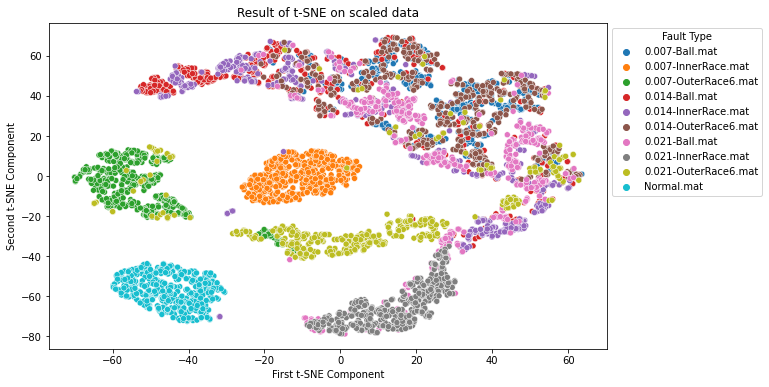

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
        x=tsne_res_wav_entro[:,0], y= tsne_res_wav_entro[:,1],
        hue=gabung_dat_1['0.1'],
        data=pd.DataFrame(tsne_res_wav_entro))

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

### Evaluation

In [ ]:
y_datagabungan=wav_dat_1['0.1'].replace({
    '0.007-Ball.mat': 1,
    '0.007-InnerRace.mat' : 2,
    '0.007-OuterRace6.mat' : 3,
    '0.014-Ball.mat' : 4,
    '0.014-InnerRace.mat' : 5,
    '0.014-OuterRace6.mat' : 6,
    '0.021-Ball.mat' : 7,
    '0.021-InnerRace.mat' : 8,
    '0.021-OuterRace6.mat' : 9,
})

In [ ]:
new_labeled_data=pd.concat([pd.DataFrame(pca),pd.DataFrame(wav_dat_1['0.1'])],axis=1)

In [ ]:
# y = to_categorical(y_datagabungan)
X_train,X_test,y_train,y_test=train_test_split(new_labeled_data.drop('0.1',axis=1),
                                               new_labeled_data['0.1'],train_size=0.7,
                                               random_state=42)

X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,train_size=0.5,
                                             random_state=42)

# X_train = np.array(X_train).reshape(X_train.shape[0], -1, 1)
# X_test = np.array(X_test).reshape(X_test.shape[0], -1, 1)
# X_val = np.array(X_val).reshape(X_val.shape[0], -1, 1)
X_val = np.array(X_val).astype('float32')
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
pred = svc_model.predict(X_test)

In [ ]:
y_datagabungan.unique()

NameError: ignored

Text(32.99999999999999, 0.5, 'True')

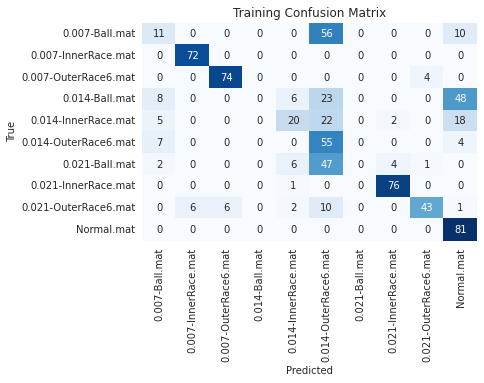

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred), annot= True,fmt = "d",
xticklabels=new_labeled_data['0.1'].unique(), yticklabels=new_labeled_data['0.1'].unique(), cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
print(classification_report(y_test,pred))

                      precision    recall  f1-score   support

      0.007-Ball.mat       0.33      0.14      0.20        77
 0.007-InnerRace.mat       0.92      1.00      0.96        72
0.007-OuterRace6.mat       0.93      0.95      0.94        78
      0.014-Ball.mat       0.00      0.00      0.00        85
 0.014-InnerRace.mat       0.57      0.30      0.39        67
0.014-OuterRace6.mat       0.26      0.83      0.39        66
      0.021-Ball.mat       0.00      0.00      0.00        60
 0.021-InnerRace.mat       0.93      0.99      0.96        77
0.021-OuterRace6.mat       0.90      0.63      0.74        68
          Normal.mat       0.50      1.00      0.67        81

            accuracy                           0.59       731
           macro avg       0.53      0.58      0.52       731
        weighted avg       0.54      0.59      0.53       731



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'Normal.mat' : 0,

'0.007-Ball.mat': 1,

'0.007-InnerRace.mat' : 2,

'0.007-OuterRace6.mat' : 3,

'0.014-Ball.mat' : 4,

'0.014-InnerRace.mat' : 5,

'0.014-OuterRace6.mat' : 6,

'0.021-Ball.mat' : 7,

'0.021-InnerRace.mat' : 8,

'0.021-OuterRace6.mat' : 9,